<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb) | [Contents](Index.ipynb) | [Vectorized String Operations](03.10-Working-With-Strings.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.09-Pivot-Tables.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder="/content/drive/MyDrive/資料科學/ch05"

# 敘述統計

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/資料科學/ch05/Titanic_02.csv')
df

,Row No.,Passenger Class,Name,Sex,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,1,First,"Allen, Miss. Elisabeth Walton",Female,29,0,0,24160,211.3375,B5,Southampton,2,Yes
1,2,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.55,C22 C26,Southampton,11,Yes
2,3,First,"Allison, Miss. Helen Loraine",Female,2,1,2,113781,151.55,C22 C26,Southampton,?,No
3,4,First,"Allison, Mr. Hudson Joshua Creighton",Male,30,1,2,113781,151.55,C22 C26,Southampton,?,No
4,5,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25,1,2,113781,151.55,C22 C26,Southampton,?,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,Third,"Zabour, Miss. Hileni",Female,14.5,1,0,2665,14.4542,?,Cherbourg,?,No
1305,1306,Third,"Zabour, Miss. Thamine",Female,?,1,0,2665,14.4542,?,Cherbourg,?,No
1306,1307,Third,"Zakarian, Mr. Mapriededer",Male,26.5,0,0,2656,7.225,?,Cherbourg,?,No
1307,1308,Third,"Zakarian, Mr. Ortin",Male,27,0,0,2670,7.225,?,Cherbourg,?,No


In [5]:
# 將'Age'轉換為數值型態
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
# 確認轉換後的數據類型
print(df["Age"].dtype)

# 使用平均值填補缺失值
mean_age = df["Age"].mean()
df["Age"] = df["Age"].fillna(mean_age)

# 將 "Survived" 列的 "Yes" 改成 1，"No" 改成 0
df["Survived"] = df["Survived"].map({"Yes": 1, "No": 0})
df

float64


,Row No.,Passenger Class,Name,Sex,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,1,First,"Allen, Miss. Elisabeth Walton",Female,29.000000,0,0,24160,211.3375,B5,Southampton,2,1
1,2,First,"Allison, Master. Hudson Trevor",Male,0.916700,1,2,113781,151.55,C22 C26,Southampton,11,1
2,3,First,"Allison, Miss. Helen Loraine",Female,2.000000,1,2,113781,151.55,C22 C26,Southampton,?,0
3,4,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.000000,1,2,113781,151.55,C22 C26,Southampton,?,0
4,5,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.000000,1,2,113781,151.55,C22 C26,Southampton,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,Third,"Zabour, Miss. Hileni",Female,14.500000,1,0,2665,14.4542,?,Cherbourg,?,0
1305,1306,Third,"Zabour, Miss. Thamine",Female,29.881135,1,0,2665,14.4542,?,Cherbourg,?,0
1306,1307,Third,"Zakarian, Mr. Mapriededer",Male,26.500000,0,0,2656,7.225,?,Cherbourg,?,0
1307,1308,Third,"Zakarian, Mr. Ortin",Male,27.000000,0,0,2670,7.225,?,Cherbourg,?,0


In [6]:
df.describe()

,Row No.,Age,No of Sibilings or Spouses on Board,No of Partners or Childern on Board,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.881135,0.498854,0.385027,0.381971
std,378.020061,12.883199,1.041658,0.865560,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,22.000000,0.000000,0.000000,0.000000
50%,655.000000,29.881135,0.000000,0.000000,0.000000
75%,982.000000,35.000000,1.000000,0.000000,1.000000
max,1309.000000,80.000000,8.000000,9.000000,1.000000


# 盒鬚圖


In [7]:
# 男性存活的年齡層
Male_survival_data = df[(df["Sex"] == "Male") & (df["Survived"] == 1)]
Male_survival_list = Male_survival_data["Age"].tolist()
print(Male_survival_list)

# 女性存活的年齡層
Female_survival_data = df[(df["Sex"] == "Female") & (df["Survived"] == 1)]
Female_survival_list = Female_survival_data["Age"].tolist()
print(Female_survival_list)

[0.9167, 48.0, 80.0, 37.0, 26.0, 25.0, 28.0, 40.0, 29.8811345124283, 42.0, 36.0, 11.0, 36.0, 27.0, 45.0, 51.0, 27.0, 31.0, 53.0, 4.0, 49.0, 36.0, 50.0, 43.0, 60.0, 49.0, 53.0, 23.0, 25.0, 48.0, 27.0, 29.8811345124283, 35.0, 38.0, 49.0, 42.0, 35.0, 29.8811345124283, 36.0, 30.0, 29.8811345124283, 52.0, 29.8811345124283, 45.0, 13.0, 29.8811345124283, 29.8811345124283, 34.0, 35.0, 56.0, 28.0, 24.0, 6.0, 45.0, 32.0, 54.0, 48.0, 17.0, 31.0, 21.0, 29.8811345124283, 32.0, 1.0, 34.0, 0.8333, 26.0, 24.0, 8.0, 8.0, 0.6667, 62.0, 42.0, 1.0, 19.0, 2.0, 3.0, 20.0, 22.0, 29.8811345124283, 29.0, 30.0, 0.8333, 3.0, 2.0, 31.0, 29.8811345124283, 25.0, 20.0, 0.8333, 26.0, 27.0, 3.0, 23.0, 20.0, 32.0, 21.0, 32.0, 18.0, 9.0, 3.0, 45.0, 29.0, 36.5, 30.0, 1.0, 19.0, 24.0, 29.8811345124283, 29.8811345124283, 9.0, 27.0, 29.8811345124283, 29.8811345124283, 29.0, 21.0, 29.8811345124283, 26.0, 4.0, 32.0, 32.0, 21.0, 39.0, 29.8811345124283, 29.0, 25.0, 29.8811345124283, 26.0, 22.0, 20.0, 27.0, 32.0, 24.0, 29.881134

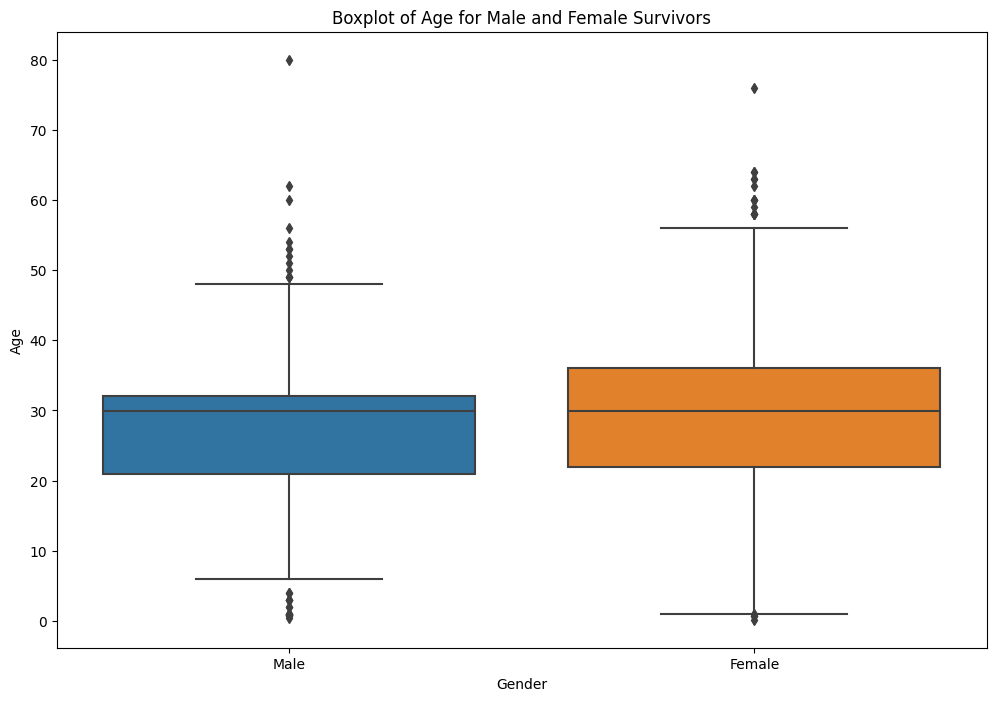

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(x = 'Sex', y = 'Age', data = pd.DataFrame({'Sex':['Male']*len(Male_survival_list) + ['Female']*len(Female_survival_list), 'Age':Male_survival_list + Female_survival_list}))

plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Boxplot of Age for Male and Female Survivors")
plt.show()

# 常態分配圖

<ipython-input-9-fe39655420ca>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Male_survival_list, hist=False, kde=True, label="Male Survivors")
<ipython-input-9-fe39655420ca>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Female_survival_list, hist=False, kde=True, label="F

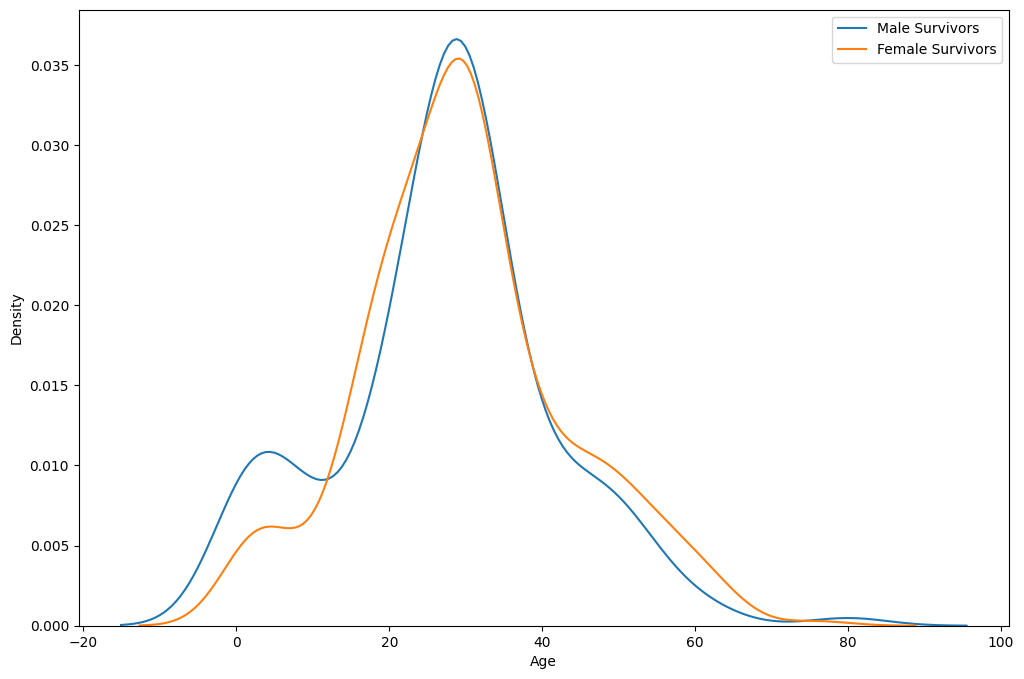

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.distplot(Male_survival_list, hist=False, kde=True, label="Male Survivors")
sns.distplot(Female_survival_list, hist=False, kde=True, label="Female Survivors")

plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()